# Spatial data
Methods and identification

*Andreas Bjerre-Nielsen*

# Overview

- [Boundary Discontinuity Design](#Boundary-Discontinuity-Design)
- [Natural experiments](#Natural-experiments)
- [Spatial econometrics](#Spatial-econometrics)

# Boundary Discontinuity Design



## Regression discontinuity design

Pioneered by [Thistlewaite,  Campbell (1960)](https://doi.org/10.1037/h0044319). Fundmental idea:

- there is some measurable characteristics $x$ 
- exist rhreshold $t$ where $x>t$ implies treatment, otherwise not.
- we can compare groups around $t$:
    - just above is treatment group
    - just below is control group

## Spatial discontinuities

[Black (1999)](https://doi.org/10.1162/003355399556070) argues that administrative boundaries can be used as regression discontinuity
- Municipal borders affect residents which implies differences in taxes, services etc.
- School districts affect school guarantees.
    - Black  finds strong effect on house prices from schools.
- Idea: unobserved selection is removed.

## School districts in Copenhagen

We can repeat the analysis with data from Copenhagen (exercises).

In [2]:
import geopandas as gpd
%matplotlib inline

url_school = \
    'http://wfs-kbhkort.kk.dk/k101/ows?'+\
    'service=WFS&version=1.0.0&request=GetFeature'+\
    '&typeName=k101:skolegrunddistrikt&outputFormat=json'+\
    '&SRSNAME=EPSG:4326'

gdf = gpd.read_file(url_school).to_crs(epsg=25832)

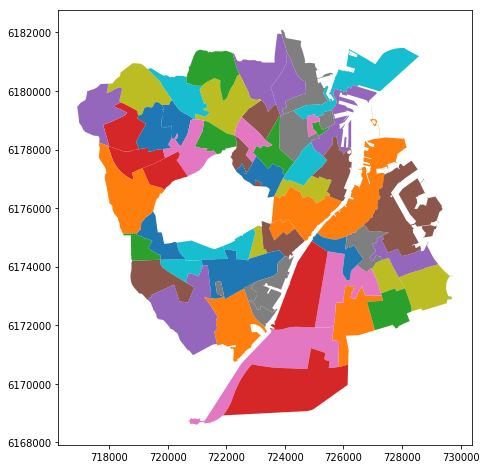

In [4]:
gdf.plot(column='skolekode', figsize = (8,8))

## School districts in Indre Nørrebro

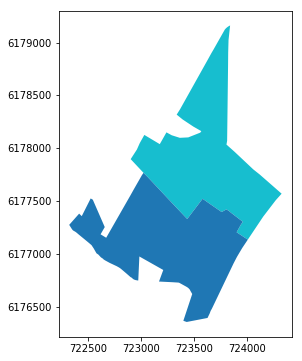

In [32]:
gdf_in = gdf[gdf.skolekode.isin(['BLÅ','GUL'])]
gdf_in.plot(column='skolekode', figsize = (6,6))

## School district boundaries in Copenhagen


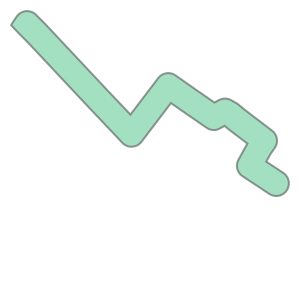

In [41]:
border_dist_m = 50
g,b = gdf_in.geometry.buffer(border_dist_m).tolist()
g.intersection(b).difference(removal.buffer(border_dist_m))

## School districts impact on house prices

School boundary distance and house prices in Denmark

<center>
<img src="plots/BDD_frStata_ses_big-1.jpg" alt="school boundary house prices" width="650"> 
</center>

## School districts impact on enrollement

[Bjerre-Nielsen, Gandil (2018)](https://www.dropbox.com/s/1buc3mnz9dot8zt/OptingOutOfPublicSchools.pdf?dl=0) analyzes local school avoidance across school boundaries
<center>
<img src="plots/BDD_gridtile_opt_out_pca1_mix_rank-1.jpg" alt="school boundary enrollment" width="600"> 
</center>

## School districts impact on enrollement

School boundary distance and breakdown of local school avoidance

<table>
    <tr>
        <td>
            <center>  <font size="3">Moving district</font>  </center>
            <img src="plots/BDD_gridtile_flytte_dist_5_pca1_mix_rank-1.jpg" alt="school boundary house prices" width="400"> 
        </td>
        <td>
            <center> <font size="3">Other public school</font> </center>
            <img src="plots/BDD_gridtile_other_pub_pca1_mix_rank-1.jpg" alt="school boundary house prices" width="400"> 
        </td>
        <td>
            <center> <font size="3"> Private school</font>  </center>
            <img src="plots/BDD_gridtile_privat_pca1_mix_rank-1.jpg" alt="school boundary house prices" width="400"> 
        </td>        
    </tr>
</table>




## Newer studies



- [Gibbons et al. (2013)](https://doi.org/10.1016/j.jue.2012.11.001) uses a matching approach and compare with similar houses across borders. Smart robusness:
    - control local spatial price trends within borders 
    - removes border on large roads 
- [Fack, Grenet (2010)](https://doi.org/10.1016/j.jpubeco.2009.10.009) shows that the local availability of private schools decreases effects of school districts on house prices

## Closing thoughts

- Remaining threats
    - are neighorhood controls bad?
        - these are co-determined by school districts
    - is there a discontinuity? risk of redrawing boundaries is larger near boundary
    - selection (unobservable differences)
- Proposed mechanism: school reputation
    - [Figlio, Lucas (2004)](https://doi.org/10.1257/0002828041464489) show that differences across school districts are driven by long term changes in school grades
    - [Fiva, Kirkebøen (2011)](https://doi.org/10.1111/j.1467-9442.2011.01651.x) exploits a natural change in information availability and find evidence of supply of information on price differences

# Natural experiments 
***With a spatial component***

## Weather effects

Since early studies on weather economists have loved it, why?

- Weather is exogenous and there is LOTS of data.
- National Oceanic and Atmospheric Administration provides global weather data

So what has been studied? Some macro effects:
- human conflicts [Hsiang et al. (2013)](http://science.sciencemag.org/content/341/6151/1235367)
- economic growth [Miguel et al. (2004)](https://doi.org/10.1086/421174)
- see literature review by [Dell et al. (2014)](https://doi.org/10.3386/w19578)

## Weather and ?

Newer have studies examined effect on individual behavior:
- sleep loss ([Obradovich et al. (2017)](https://doi.org/10.1126/sciadv.1601555))
- sentiment (revealed mood) on social media ([Baylis et al. (2018)](https://doi.org/10.1371/journal.pone.0195750))

<br>
<br>
<br>
<center>
<img src="https://journals.plos.org/plosone/article/figure/image?size=large&id=10.1371/journal.pone.0195750.g002" alt="school boundary house prices" width="800"> 
</center>

## A note on instrumentation

In order to measure causal effect from A to B we can use instrument variables.

Is weather a valid instrument? 

- Requires that there is only one causal path.
- [Dell et al. (2014)](https://doi.org/10.3386/w19578) argues that it is still suffient to show reduced form effects (although these are not causal!)

## Exploiting sunset variation
Establishing whether there is discrimination in police stops has been hard. What could be used?

After sunset discrimination is harder. [Pierson et al. (2019)](https://5harad.com/papers/100M-stops.pdf) uses variation in sunset times as a regression discontinuity. Visulization by [The Economist](https://www.economist.com/graphic-detail/2019/03/15/black-drivers-in-america-face-discrimination-by-the-police):

<center>
    <img src="plots/sunset_variation.PNG" alt="sunset variation discrimination" width="1200"> 
</center>


## Changes to administrative boundaries

[Bjerre-Nielsen, Gandil (2018)](https://www.dropbox.com/s/1buc3mnz9dot8zt/OptingOutOfPublicSchools.pdf?dl=0) address the selection issue by using changes in school boundaries. Avoidance of new local school:

<center>
    <img src="plots/DID_l_yarriv_pca1_mix_rank_01-1.jpg" alt="local school avoidance - DiD" width="700"> 
</center>




## Other programmes

- Urban renewal / revitalization:
    - Increases the value of nearby house prices [Rossi-Hansberg et al. (2010)](https://doi.org/10.1086/653138)
- Refugee resettlement - random assignment to municipality or allow self-selection? (i.e. is sorting good) 
    - [Edin et al. (2003)](https://doi.org/10.1162/00335530360535225) finds that ethnic enclaves raises economic success

# Spatial econometrics

## A noble goal

The goal of spatial econometrics is to identify spatial externalities. What could go wrong?

The connectivity in space implies that there is an underlying adjacency matrix. 
- Frederiksberg road network

In [ ]:
# Roads as a network
import osmnx as ox
frb_str = 'Frederiksberg Kommune, Region Hovedstaden, Denmark'
g_frb = ox.graph_from_place(frb_str, network_type='drive')


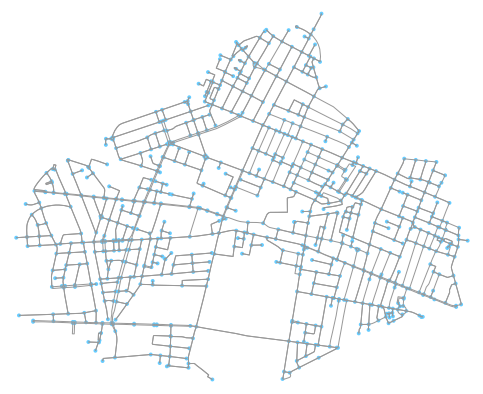

(<Figure size 1102.99x504 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x2511adf5048>)

In [42]:
ox.plot_graph(g_frb, fig_height=7)

## The consequences

We can represent spatial locations as a network, e.g. within 500m of driving. 
 - Implication: network identification problems are inherited!

The problems in network identification are the same:
- selection (neighboring municipalities are similar)
- unobservable common shocks
- it is near impossible to isolate endogenous spillovers

## Remedies for spatial econometrics

- Leverage spatial policies (boundaries, random allocation, timing)
    - Remember careful with structural modelling!
- Structural modelling as in Urban Economics

# Summary

Today we have learned about 

- boundary discontinuity design
- exogenous spatial variation
    - natural variation (e.g. weather) and policy implementation
- spatial econometrics   